<a href="https://colab.research.google.com/github/omarRmalik/Data_Analytics_Winter_2023/blob/main/KNN_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN is one of the simplest and most effective predictive algorithms. This notebook walks you through an example of the application of KNN to a classification problem.

Example:

https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

In [ ]:
# import packages

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data

df = pd.read_csv('/content/drive/MyDrive/Data Analytics/DMBA Datasets/RidingMowers.csv')
df.head(15)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [ ]:
# set alternate index

df['Number'] = df.index + 1
df.head(2)

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2


In [ ]:
# partition data

trainData, validData = train_test_split(df, test_size = 0.4, random_state = 25)
print(trainData.shape)
print(validData.shape)

(14, 4)
(10, 4)


In [ ]:
# new household

newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}])

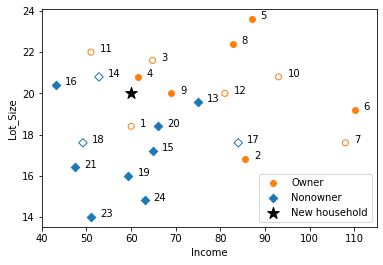

In [ ]:
## scatter plot function

def plotDataset(ax, data, showLabel = True, **kwargs):
    subset = data.loc[data['Ownership'] == 'Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker = 'o',
              label = 'Owner' if showLabel else None, color = 'C1', **kwargs)
    subset = data.loc[data['Ownership'] == 'Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker = 'D',
               label = 'Nonowner' if showLabel else None, color = 'C0', **kwargs)
    plt.xlabel('Income')
    plt.ylabel('Lot_Size')
    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))

fig, ax = plt.subplots()
plotDataset(ax,trainData)
plotDataset(ax,validData, showLabel = False, facecolors = 'none')
ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker = '*',
           label = 'New household', color = 'black', s = 150)

plt.xlabel('Income'); plt.ylabel('Lot_Size')
ax.set_xlim(40, 115)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = 4)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# normalize data

# use the training data to learn the transformation.
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'Lot_Size']]) # Note use of array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform
    (df[['Income', 'Lot_Size']]),columns=['zIncome',     
    'zLot_Size']), df[['Ownership', 'Number']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
validNorm = mowerNorm.iloc[validData.index]
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold),
    columns=['zIncome', 'zLot_Size'])

mowerNorm.head(2)

,zIncome,zLot_Size,Ownership,Number
0,-0.519670,-0.052608,Owner,1
1,0.956242,-0.641821,Owner,2


In [ ]:
# fit knn model

knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm.iloc[:, 0:2])
distances, indices = knn.kneighbors(newHouseholdNorm)

In [ ]:
# train and validate knn model in a loop

train_X = trainNorm[['zIncome', 'zLot_Size']]
train_y = trainNorm['Ownership']
valid_X = validNorm[['zIncome', 'zLot_Size']]
valid_y = validNorm['Ownership']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
       'k': k,
       'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
})

In [ ]:
# save results in a dataframe and print

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1       0.5
1    2       0.7
2    3       0.8
3    4       0.7
4    5       0.8
5    6       0.7
6    7       0.8
7    8       0.7
8    9       0.7
9   10       0.6
10  11       0.7
11  12       0.4
12  13       0.4
13  14       0.4
